In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import scipy
import emcee
import corner
import lalsimulation as ls
import h5py
import snr_calculation as s 
import populations as p
from scipy.stats import truncnorm
import processing
%load_ext autoreload
%autoreload 2

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titledef 

Convergence plotting code

-1.1000623589172072 5.481180434194754


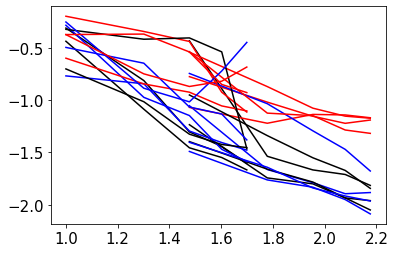

In [143]:
rows_list = []
already_done = [['Design', 'u', '2.0', '2.0']]
folder = 'LMG_convergence_99pc'
slopes = []
base_dir = '../spin_results/outputs/{}/'.format(folder)
dlist = os.listdir(base_dir)

for i in dlist:
    test = []
    test.append(i.split('_')[0]) # detector
    if test[0] == 'APlus':
        counts = np.linspace(30, 150, num=5, dtype='int16')
    elif test[0] == 'Design':
        counts = np.linspace(10, 50, num=5, dtype='int16')

    if 'png' not in i and os.path.isfile(os.path.join(base_dir, i)):
        if '_u' in i: # mass model
            test.append('u')
        elif '_1c' in i:
            test.append('1c')
        else:
            test.append('2c')

        test.append(i.split('_')[2]) # mTOV
        test.append(i.split('_')[4]) # bhmin

        if [test[0], test[1], test[2], test[3]] not in already_done:
            #print(i)
            widths = []
            constraints = np.zeros((5,7))
            index = 0
            for count in counts:
                mtov_path = base_dir + test[0] + '_mTOV_' + test[2] + '_bhmin_' + test[3] + '_' + str(count) + '.txt'
                if test[1] is 'u':
                    mtov_path = base_dir + test[0] + '_mTOV_' + test[2] + '_bhmin_' + test[3] + '_' + str(count) + '_u.txt'
                if test[1] is '1c':
                    mtov_path = base_dir + test[0] + '_mTOV_' + test[2] + '_bhmin_' + test[3] + '_' + str(count) + '_1c.txt'
                mtov_dat = np.genfromtxt(mtov_path)

                mtov_str = '${0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}$'.format(mtov_dat[3], mtov_dat[4]-mtov_dat[3], mtov_dat[3]-mtov_dat[2])
                widths.append((mtov_dat[4]-mtov_dat[2])/2)
                test.append(mtov_str)
                constraints[index] = mtov_dat
                index += 1


            already_done.append([test[0], test[1], test[2], test[3]])

            slope, intercept = np.polyfit(np.log10(counts), np.log10(widths), deg=1)
            test.append(slope)
            test.append(10**intercept)
            rows_list.append(test)
            
            if test[3] == '2.2' or test[3] == '2.0':
                plt.plot(np.log10(counts), np.log10(widths), c='k')
            elif test[3] == '2.41' or test[3] == '2.65':
                plt.plot(np.log10(counts), np.log10(widths), c='b')
            else:
                plt.plot(np.log10(counts), np.log10(widths), c='r')

df = pd.DataFrame(rows_list)
select = df[df[3] == '2.2']
print(np.mean(select[9]), np.mean(select[10]))

-0.5593928833710509

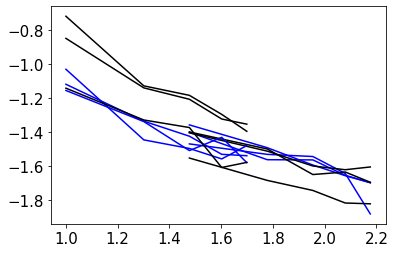

In [129]:
rows_list = []
already_done = [] #['Design', 'u', '2.0', '2.0']
folder = 'lowspin/mTOV'
base_dir = '../spin_results/outputs/{}/'.format(folder)
dlist = os.listdir(base_dir)

for i in dlist:
    test = []
    test.append(i.split('_')[0]) # detector
    if test[0] == 'APlus':
        counts = np.linspace(30, 150, num=5, dtype='int16')
    elif test[0] == 'Design':
        counts = np.linspace(10, 50, num=5, dtype='int16')

    if 'png' not in i and os.path.isfile(os.path.join(base_dir, i)):
        if '2c' in i:
            test.append('2c')
        elif '_u' in i:
            test.append('u')
        else:
            test.append('1c')

        test.append(i.split('_')[2]) # mTOV

        if i.split('_run_')[0]+'_'+test[1] not in already_done:
            #print(i)
            widths = []
            constraints = np.zeros((5,7))
            index = 0
            for count in counts:
                mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '.txt'
                if test[1] is '2c':
                    mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '_2component.txt'
                if test[1] is 'u':
                    mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '_uniform.txt'

                mtov_dat = np.genfromtxt(mtov_path)

                mtov_str = '${0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}$'.format(mtov_dat[3], mtov_dat[4]-mtov_dat[3], mtov_dat[3]-mtov_dat[2])
                widths.append((mtov_dat[4]-mtov_dat[2])/2)
                test.append(mtov_str)
                constraints[index] = mtov_dat
                index += 1

            already_done.append(i.split('_run_')[0]+'_'+test[1])
            slope, intercept = np.polyfit(np.log10(counts), np.log10(widths), deg=1)
            test.append(slope)
            test.append(10**intercept)
            rows_list.append(test)
            
            if test[2] == '2.2':
                plt.plot(np.log10(counts), np.log10(widths), c='k')
            elif test[2] == '2.0':
                plt.plot(np.log10(counts), np.log10(widths), c='b')
np.mean(pd.DataFrame(rows_list)[8])

-0.4919426735892054

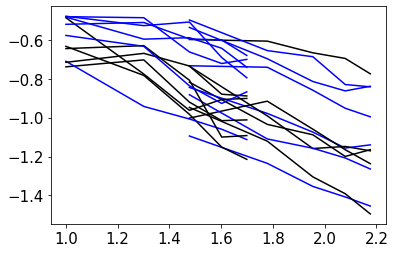

In [137]:
import os
rows_list = []
slopes = []
already_done = [] # medspin ['APlus_mTOV_2.0_1c_0.4','APlus_mTOV_2.2_2c_0.4'] # lowspin['APlus_mTOV_2.0_1c_0.2']  
folder = 'lowspin/slope'
base_dir = '../spin_results/outputs/{}/'.format(folder)
dlist = os.listdir(base_dir)

for i in dlist:
    test = []
    test.append(i.split('_')[0]) # detector
    if test[0] == 'APlus':
        counts = np.linspace(30, 150, num=5, dtype='int16')
    elif test[0] == 'Design':
        counts = np.linspace(10, 50, num=5, dtype='int16')

    if 'png' not in i and os.path.isfile(os.path.join(base_dir, i)) and 'slope' in i:
        if '2c' in i:
            test.append('2c')
        elif '_u' in i:
            test.append('u')
        elif '1c' in i:
            test.append('1c')

        test.append(i.split('_')[2])
        test.append(i.split('_')[-1].split('.txt')[0])

        if i.split('_run_')[0]+'_'+test[1]+'_'+test[3] not in already_done and '0.' in i:
            #print(i)
            widths = []
            constraints = np.zeros((5,7))
            index = 0
            for count in counts:
                mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '_1c_slope_{}.txt'.format(test[3])
                if test[1] is '2c':
                    mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '_2c_slope_{}.txt'.format(test[3])
                if test[1] is 'u':
                    mtov_path = base_dir + i.split('_run_')[0] + '_run_' + str(count) + '_u_slope_{}.txt'.format(test[3])

                mtov_dat = np.genfromtxt(mtov_path)

                mtov_str = '${0:.2f}^{{+{1:.2f}}}_{{-{2:.2f}}}$'.format(mtov_dat[3], mtov_dat[4]-mtov_dat[3], mtov_dat[3]-mtov_dat[2])
                widths.append((mtov_dat[4]-mtov_dat[2])/2)
                test.append(mtov_str)
                constraints[index] = mtov_dat
                index += 1

            already_done.append(i.split('_run_')[0]+'_'+test[1]+'_'+test[3])
            slope, intercept = np.polyfit(np.log10(counts), np.log10(widths), deg=1)
            test.append(slope)
            test.append(10**intercept)
            rows_list.append(test)
            if test[3] == '0.2':
                plt.plot(np.log10(counts), np.log10(widths), c='k')
            elif test[3] == '0.4':
                plt.plot(np.log10(counts), np.log10(widths), c='b')
np.mean(pd.DataFrame(rows_list)[9])

In [107]:
processing.table('mTOV_convergence_99pc/bias', mode='bias', save='bias', plot=False)

APlus_mTOV_2.0_run_120_1c_bias.txt
APlus_mTOV_2.0_run_120_2c_bias.txt
APlus_mTOV_2.0_run_120_u_bias.txt
APlus_mTOV_2.2_run_120_1c_bias.txt
APlus_mTOV_2.2_run_120_2c_bias.txt
APlus_mTOV_2.2_run_120_u_bias.txt
Design_mTOV_2.0_run_10_1c_bias.txt
Design_mTOV_2.0_run_10_2c_bias.txt
Design_mTOV_2.0_run_10_u_bias.txt
Design_mTOV_2.2_run_10_1c_bias.txt
Design_mTOV_2.2_run_10_2c_bias.txt
Design_mTOV_2.2_run_10_u_bias.txt


In [4]:
def get_quantiles(fname, index, quantiles, hist=False, folder='mTOV_convergence', columns=None):
    root = '/mnt/c/users/christine/gwcosmology/spin_results/' + folder
    # print(root)
    array = np.genfromtxt(root+fname)
    
    if columns is not None:
        array[:,0] = array[:, columns[0]] - array[:, columns[1]]
        index = 0
    array = array[:,index]
    if hist:
        plt.hist(array,bins=50)
    return np.quantile(array, quantiles)

def plot_constraints(constraints, counts, color='b', label=True, hatch=None):
    # plt.fill_between(counts, constraints[:,0], constraints[:,6], color='b', alpha=0.1, label = '$3\sigma$')
    plt.fill_between(counts, constraints[:,1], constraints[:,5], color=color,ec='k', hatch=hatch, alpha=0.2, label = '$2\sigma$')
    plt.fill_between(counts, constraints[:,2], constraints[:,4], color=color,ec='k', hatch=hatch, alpha=0.3, label = '$1\sigma$')
    plt.plot(counts, constraints[:,3], c='k')
    plt.scatter(counts, constraints[:,3], c='k', s=30)
    if label:
        plt.legend()

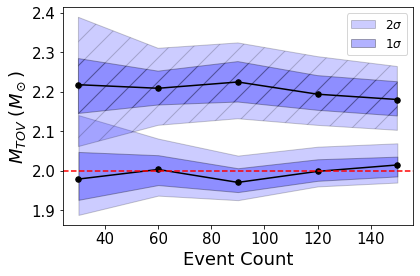

In [85]:
c1 = np.zeros((5, 7))
c2 = np.zeros((5,7))
counts = np.linspace(30,150,5,dtype='int16')
for i in range(5):
    c1[i] = np.genfromtxt('../spin_results/outputs/mTOV_convergence/mTOV/APlus_mTOV_2.0_run_{}.txt'.format(counts[i]))
    c2[i] = np.genfromtxt('../spin_results/outputs/mTOV_convergence_99pc/bias_99pc/APlus_mTOV_2.0_run_{}_2c_bias.txt'.format(counts[i]))
plot_constraints(c1, counts)
plot_constraints(c2, counts, label=False, hatch='/')
plt.ylabel('$M_{TOV}$ ($M_\odot$)')
plt.xlabel('Event Count')
plt.axhline(2.0, c='r', ls='--')
plt.tight_layout()
plt.savefig('../spin_results/figures/simulations/APlus_mTOV_2.0_2c_bias_99pc.pdf')

In [5]:
def quantiles_from_data(array, quantiles, hist=False):    
    if hist:
        plt.hist(array,bins=50)
    return np.quantile(array, quantiles)

def get_constraints(data, name, folder='real_data'):
    constraints = np.zeros(7)
    sigma_1 = quantiles_from_data(data, [0.159, 0.841])
    sigma_2 = quantiles_from_data(data, [0.025, 0.975])
    sigma_3 = quantiles_from_data(data, [0.0015, 0.997])
    
    med = quantiles_from_data(data, [0.5])
    
    constraints = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    
    print('../spin_results/outputs/{}/{}'.format(folder, name))
    np.savetxt('../spin_results/outputs/{}/{}'.format(folder, name), constraints)
    return constraints

Code to make trace plots from real data

In [ ]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)

count = 0
colors = ['b', 'k', 'r']

for i in ['1c_default_chieff_withgw190814_withgw190426_0q.txt', '2c_default_chieff_withgw190814_withgw190426_0q.txt', 'u_default_chieff_withgw190814_withgw190426_0q.txt']:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        
        
        if '2c' in root:
            for j in range(5000):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                x = np.linspace(1, 3.5, 500)
                plt.plot(x, p.two_truncnormal_like(x, point[0], point[1], point[2], point[3], point[4], 1, np.ones(500)*point[5]), c=colors[count], alpha=0.005)
                
            
        elif '1c' in root:
            for j in range(5000):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                x = np.linspace(1, 3.5, 500)
                plt.plot(x, truncnorm.pdf(x, loc=point[0], scale=point[1], a=(1-point[0])/point[1], b=(point[2]-point[0])/point[1]), c=colors[count], alpha=0.005)
            
        elif 'u' in root:
            for j in range(5000):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                x = np.linspace(0.8,3.2, 500)
                pdf = np.zeros(500)
                pdf[np.logical_and(x>1, x<point[2])] = 1/(point[2]-1)
                plt.plot(x, pdf, c=colors[count], alpha=0.005)
        plt.xlabel('Mass $M_\odot$')
        count += 1
plt.ylim(0, 2)

In [ ]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)

count = 0
colors = ['b', 'k', 'r']
labels = ['1C', '2C', 'U']
variation = '_default_chieff_withgw190814_withgw190426_'

for i in ['1c{}.txt'.format(variation), '2c{}.txt'.format(variation), 'u{}.txt'.format(variation)]:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 1000
        N2 = 100
        results = np.zeros((N1, N2))
        x = np.linspace(1, 3.3, N2)
        
        
        if '2c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.two_truncnormal_like(x, point[0], point[1], point[2], point[3], point[4], 1, \
                                                    np.ones(N2)*point[5])
                
            
        elif '1c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = truncnorm.pdf(x, loc=point[0], scale=point[1], a=(1-point[0])/point[1], \
                                           b=(point[2]-point[0])/point[1])
            
        elif 'u' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j,np.logical_and(x>1, x<point[2])] = 1/(point[2]-1)
                
        plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                         color = colors[count], label = labels[count], alpha = 0.2)
        plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
        count += 1
        
plt.legend()
plt.ylabel('$P(m_2)$')
plt.ylim(0, 2)
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
plt.savefig('../spin_results/figures/real_data/trace{}.pdf'.format(variation))

u_widespin_chieff_withgw190814_withgw190426_
u_widespin_chieff_nogw190814_nogw190426_
u_widespin_chieff_withgw190814_withgw190426_0q


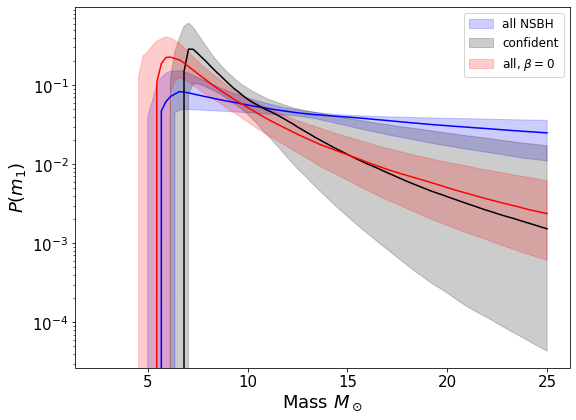

In [44]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)
fig = plt.figure(figsize=(8,6))
count = 0
colors = ['b', 'k', 'r']
labels = ['1C', '2C', 'U']
variation = 'widespin'
#['1c{}.txt'.format(variation), '2c{}.txt'.format(variation), 'u{}.txt'.format(variation)]
labels=['all NSBH', 'confident', r'all, $\beta=0$']
for i in ['u_widespin_chieff_withgw190814_withgw190426_.txt', 'u_widespin_chieff_nogw190814_nogw190426_.txt','u_widespin_chieff_withgw190814_withgw190426_0q.txt']:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 1000
        N2 = 100
        results = np.zeros((N1, N2))
        x = np.linspace(2.5, 25, N2)
        
        
        if '2c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[6], point[7])
                
            
        else:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[3], point[4])
                
        plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                         color = colors[count], label = labels[count], alpha = 0.2)
        plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
        count += 1
        
plt.legend()
plt.ylabel('$P(m_1)$')
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
plt.yscale('log')
plt.savefig('../spin_results/figures/real_data/m1_trace{}.pdf'.format(variation))

1c_default_chieff_withgw190814_withgw190426_
2c_default_chieff_withgw190814_withgw190426_
u_default_chieff_withgw190814_withgw190426_
1c_default_chieff_withgw190814_withgw190426_
2c_default_chieff_withgw190814_withgw190426_
u_default_chieff_withgw190814_withgw190426_


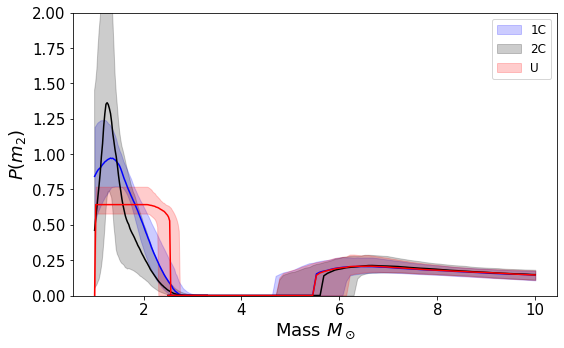

In [91]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)
fig = plt.figure(figsize=(8,5))

count = 0
colors = ['b', 'k', 'r']
labels = ['1C', '2C', 'U']
variation = '_default_chieff_withgw190814_withgw190426_'

for i in ['1c{}.txt'.format(variation), '2c{}.txt'.format(variation), 'u{}.txt'.format(variation)]:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 1000
        N2 = 100
        results = np.zeros((N1, N2))
        x = np.linspace(1, 3.3, N2)
        
        
        if '2c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.two_truncnormal_like(x, point[0], point[1], point[2], point[3], point[4], 1, \
                                                    np.ones(N2)*point[5])
                
            
        elif '1c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = truncnorm.pdf(x, loc=point[0], scale=point[1], a=(1-point[0])/point[1], \
                                           b=(point[2]-point[0])/point[1])
            
        elif 'u' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j,np.logical_and(x>1, x<point[2])] = 1/(point[2]-1)
                
        plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                         color = colors[count], label = labels[count], alpha = 0.2)
        plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
        count += 1

count = 0
for i in ['1c{}.txt'.format(variation), '2c{}.txt'.format(variation), 'u{}.txt'.format(variation)]:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 1000
        N2 = 100
        results = np.zeros((N1, N2))
        x = np.linspace(2.5, 10, N2)
        
        
        if '2c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[6], point[7], 11)
                
            
        else:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[3], point[4], 11)
                
        plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                         color = colors[count], alpha = 0.2)
        plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
        count += 1
        
plt.legend()
plt.ylabel('$P(m_2)$')
plt.ylim(0, 2)
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
plt.savefig('../spin_results/figures/real_data/lmg_trace{}.pdf'.format(variation))

In [4]:
datatype = 'chieff_samples'
gw190814 = np.genfromtxt('./real_data/gw190814_{}.txt'.format(datatype))
m1 = gw190814[:,0]
m2 = gw190814[:,1]
s1 = gw190814[:,2]
s2 = gw190814[:,3]
#gw190814[:,3] = (m1*s1 + m2*s2)/(m1+s2)
#gw190814[:,2] = m2/m1

gw190426 = np.genfromtxt('./real_data/gw190426_{}.txt'.format(datatype))
m1 = gw190426[:,0]
m2 = gw190426[:,1]
s1 = gw190426[:,2]
s2 = gw190426[:,3]
#gw190426[:,3] = (m1*s1 + m2*s2)/(m1+s2)
#gw190426[:,2] = m2/m1

gw200115 = np.genfromtxt('./real_data/gw200115_{}.txt'.format(datatype))
m1 = gw200115[:,0]
m2 = gw200115[:,1]
s1 = gw200115[:,2]
s2 = gw200115[:,3]
#gw200115[:,3] = (m1*s1 + m2*s2)/(m1+s2)
#gw200115[:,2] = m2/m1

gw200105 = np.genfromtxt('./real_data/gw200105_{}.txt'.format(datatype))
m1 = gw200105[:,0]
m2 = gw200105[:,1]
s1 = gw200105[:,2]
s2 = gw200105[:,3]
#gw200105[:,3] = (m1*s1 + m2*s2)/(m1+s2)
#gw200105[:,2] = m2/m1

In [10]:
def credible_levels(ps, fs):
    """Find the probability levels that correspond to a given array of credible levels, e.g. to then pass into the levels argument of a contour plot
    Parameters:
       ps (1-d numpy array):
          the PDF values, a flattened array
       fs (1-d numpy array):
          the desired credible levels in ascending order, e.g. array([0.5,0.9]) for 50% and 90% credible levels
    """
    sorter = np.argsort(ps)
    ps_sorted = ps[sorter]
    ps_sorted = ps_sorted[::-1] #largest to smallest
    csum = np.cumsum(ps_sorted)
    #print(csum)
    #print(fs) 
    idxs = np.searchsorted(csum,fs*csum[-1])
    levels = ps_sorted[idxs]
    levels = levels[::-1]
    return levels

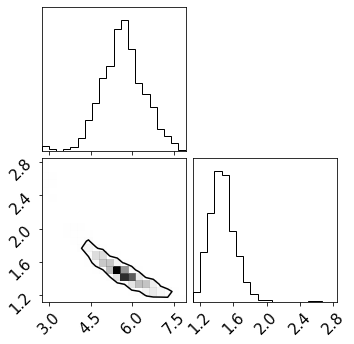

In [62]:
corner.corner(gw190426[:,:2], levels=[0.9], plot_datapoints=False);

1c_default_chieff_nogw190814_nogw190426_0q
7.267127172186752 5.270099984059868
5.7311015946680115 6.624224645522511
6.177647225037083 5.3619073480795985
6.007246997970299 9.105526094928248
6.468148501247911 9.258547828855956
6.141578976075367 5.664738890921916
4.309231263996858 4.228487156475708
6.776855173174446 8.682402062875171
6.574886170177896 5.106457110256846
6.347578361461156 6.956675271828173
6.798777776661491 7.853598743287906
7.268543524942966 6.9182187366619035
4.854276684492703 4.617114426940254
5.308353572477224 5.603567001329739
7.061541811373644 6.856563851168014
6.774937088856342 6.608446373487109
3.5580269830353153 3.9902644238231675
6.5440707590381235 7.809236413534494
6.186752446073054 9.752392291073395
6.923971735757482 8.204221340607546
7.265607822612919 4.275841927247086
6.36828847478532 7.333738047781969
6.50988599407684 6.0668219314205185
6.212096244561131 5.921794775054274
5.922492032743062 2.42814644228739
4.656356543672918 2.936961253927609
6.432346324870535

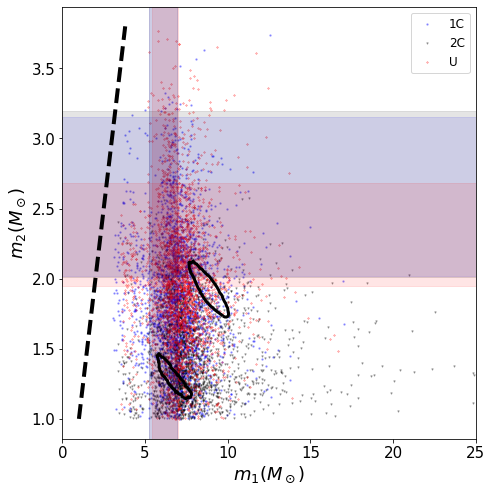

In [16]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)

fig = plt.figure(figsize=(7,7))
count = 0
colors = ['b', 'k', 'r']
markers = ['o', 'v', 'x']
labels = ['1C', '2C', 'U']
variation = '_default_chieff_nogw190814_nogw190426_0q'

for i in ['1c{}.txt'.format(variation), '2c{}.txt'.format(variation), 'u{}.txt'.format(variation)]:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 50
        
        
        if '2c' in root:
            for j in range(N1):
                #print(j)
                point = int(np.random.choice(indices, 1))
                point = real[point]
                test = p.Population([point[0], point[1], point[2], point[3], point[4], point[5], 1, 0, point[6], point[7]], \
                                    'nsbh', False, selection=False, verbose=False, m1_nospin = True, spinning=True, spin_params=[1, 0])
                pop = test.get_population(50, False)
                if j == 1:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], label=labels[count], color = colors[count])
                else:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], color = colors[count])
            
            plt.axvspan(np.quantile(real[:,6], 0.159), np.quantile(real[:,6], 0.841), color=colors[count], alpha=0.1)
            plt.axhspan(np.quantile(real[:,5], 0.159), np.quantile(real[:,5], 0.841), color=colors[count], alpha=0.1)
        elif '1c' in root:
            for j in range(N1):
                #print(j)
                point = int(np.random.choice(indices, 1))
                point = real[point]
                print(point[3], point[4])
                test = p.Population([point[0], point[1], point[2], 1, 3, point[3], point[4]], \
                                    'nsbh_one', False, selection=False, verbose=False, m1_nospin = True, spinning=False, spin_params=[1, 0])
                pop = test.get_population(50, False)
                if j == 1:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], label=labels[count], color = colors[count])
                else:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], color = colors[count])
            plt.axvspan(np.quantile(real[:,3], 0.159), np.quantile(real[:,3], 0.841), color=colors[count], alpha=0.1)
            plt.axhspan(np.quantile(real[:,2], 0.159), np.quantile(real[:,2], 0.841), color=colors[count], alpha=0.1)
        elif 'u' in root:
            for j in range(N1):
                #print(j)
                point = int(np.random.choice(indices, 1))
                point = real[point]
                test = p.Population([point[0], point[1], point[2], 1, 3, point[3], point[4]], \
                                    'nsbh_one', False, selection=False, verbose=False, m1_nospin = True, spinning=False, spin_params=[1, 0])
                
                pop = test.get_population(50, False)
                if j == 1:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], label=labels[count], color = colors[count])
                else:
                    plt.scatter(pop[:,:,0], pop[:,:,1], alpha=0.3, s=2, marker=markers[count], color = colors[count])
            plt.axvspan(np.quantile(real[:,3], 0.159), np.quantile(real[:,3], 0.841), color=colors[count], alpha=0.1)
            plt.axhspan(np.quantile(real[:,2], 0.159), np.quantile(real[:,2], 0.841), color=colors[count], alpha=0.1)
        count += 1

for i in [gw200115, gw200105]:
    m1 = i[:,0]
    m2 = i[:,1]
    h, xedges, yedges = np.histogram2d(m1, m2, bins=40)
    levels = credible_levels(h.flatten(), np.array([0.9]))
    plt.contour(xedges[:-1], yedges[:-1], h.T, colors='k', linewidths=3, linestyles=['solid', 'dashed'], levels=levels,)
        
plt.legend()
plt.xlim(0,25)
plt.ylabel('$m_2 (M_\odot)$')
plt.xlabel('$m_1 (M_\odot)$')
plt.tight_layout()
ys = np.linspace(1, 3.8)
plt.plot(ys, ys, ls='--', lw=4, c='k')
plt.savefig('../spin_results/figures/real_data/scatter{}.pdf'.format(variation))

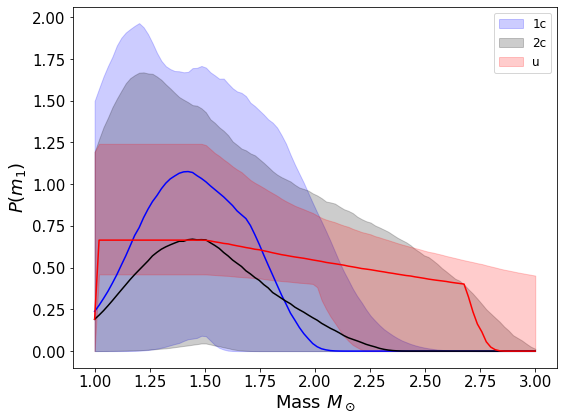

In [71]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)
fig = plt.figure(figsize=(8,6))
count = 0
colors = ['b', 'k', 'r', 'indigo']
labels = ['1c', '2c', 'u']

N1 = 10000
N2 = 100
results = np.zeros((N1, N2))
x = np.linspace(1, 3, N2)

for root in ['1c', '2c', 'u']:
    if '2c' in root:
        for j in range(N1):
            point = int(np.random.choice(indices, 1))
            point = real[point]
            tov = np.ones(N2)*(np.random.rand()*2+1.5)
            results[j] = p.two_truncnormal_like(x, np.random.rand(), np.random.rand()*(tov[0]-1)+1, np.random.rand()*0.49+0.01, \
                                                np.random.rand()*(tov[0]-1)+1, np.random.rand()*0.49+0.01, 1, tov)
            #if np.inf in results[j]:
                #print(vals)


    elif '1c' in root:
        for j in range(N1):
            point = int(np.random.choice(indices, 1))
            point = real[point]
            point = [np.random.rand()+1, np.random.rand()*0.49+0.01, np.random.rand()*2+1.5]
            results[j] = truncnorm.pdf(x, loc=point[0], scale=point[1], a=(1-point[0])/point[1], \
                                       b=(point[2]-point[0])/point[1])

    elif 'u' in root:
        for j in range(N1):
            point = int(np.random.choice(indices, 1))
            point = real[point]
            point = [np.random.rand()+1, np.random.rand()*0.49+0.01, np.random.rand()*2+1.5]
            results[j,np.logical_and(x>1, x<point[2])] = 1/(point[2]-1)

    plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                     color = colors[count], label = labels[count], alpha = 0.2)
    plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
    count += 1

plt.legend()
plt.ylabel('$P(m_1)$')
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
#plt.savefig('../spin_results/figures/real_data/m1_trace_3.pdf')

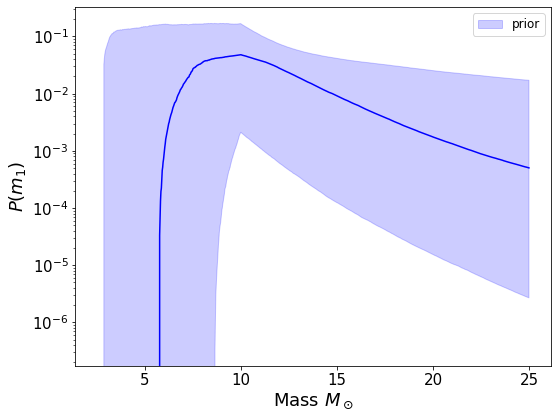

In [19]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)
fig = plt.figure(figsize=(8,6))
count = 0
colors = ['b', 'k', 'r', 'indigo']
labels = ['prior']

N1 = 10000
N2 = 1000
results = np.zeros((N1, N2))
x = np.linspace(2.5, 25, N2)

for j in range(N1):
    results[j] = p.like_plminmax(x, np.random.rand()*8.5 + 1.5, np.random.rand()*10)

plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                 color = colors[count], label = labels[count], alpha = 0.2)
plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
count += 1

plt.legend()
plt.ylabel('$P(m_1)$')
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
plt.yscale('log')
#plt.savefig('../spin_results/figures/real_data/m1_trace_3.pdf')

u_default_chieff_nogw190814_nogw190426_
u_default_chieff_withgw190814_withgw190426_
u_default_chieff_withgw190814_withgw190426_0q


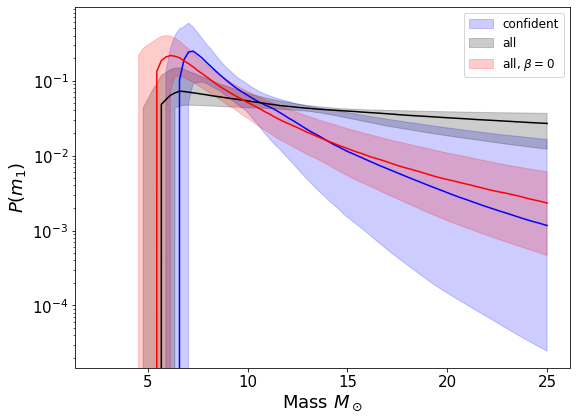

In [15]:
base='real_data'
import os
folder = '../spin_results/{}/'.format(base)
fig = plt.figure(figsize=(8,6))
count = 0
colors = ['b', 'k', 'r', 'indigo']
variations = np.array(['u_default_chieff_nogw190814_nogw190426_.txt', 'u_default_chieff_nogw190814_nogw190426_0q.txt',\
              'u_default_chieff_withgw190814_withgw190426_.txt', 'u_default_chieff_withgw190814_withgw190426_0q.txt'])
labels=np.array(['confident', r'confident, $\beta=0$', 'all', r'all, $\beta=0$' ])
variations = variations[[0,2,3]]
labels = labels[[0,2,3]]

for i in variations:
    if 'likes' not in i and os.path.isfile(os.path.join(folder, i))  and 'slope' not in i:
        root = i.split('.txt')[0]
        print(root)
        real = np.genfromtxt(folder + '{}.txt'.format(root))
        likes = np.genfromtxt(folder + '{}_likes.txt'.format(root))
        indices = np.arange(real.shape[0])
        N1 = 1000
        N2 = 100
        results = np.zeros((N1, N2))
        x = np.linspace(2.5, 25, N2)
        
        
        if '2c' in root:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[6], point[7])
                
            
        else:
            for j in range(N1):
                point = int(np.random.choice(indices, 1))
                point = real[point]
                results[j] = p.like_plminmax(x, point[3], point[4])
                
        plt.fill_between(x, np.quantile(results, 0.159, axis=0), np.quantile(results, 0.841, axis=0), \
                         color = colors[count], label = labels[count], alpha = 0.2)
        plt.plot(x, np.quantile(results, 0.5, axis=0), color = colors[count])
        count += 1
        
plt.legend()
plt.ylabel('$P(m_1)$')
plt.xlabel('Mass $M_\odot$')
plt.tight_layout()
plt.yscale('log')
plt.savefig('../spin_results/figures/real_data/m1_trace_3.pdf')

Code demonstrating constraint calculation (DEFUNCT)

In [ ]:
real = np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_2.0_bhmin_2.0_20_u.txt')
likes = np.genfromtxt('../spin_results/LMG_convergence/Design_mTOV_2.0_bhmin_2.0_20_u_likes.txt')

In [ ]:
constraints = get_constraints_lmg_2c(np.linspace(30,150,5,dtype='int16'), 2.0, 5.0)
plot_constraints(-1*constraints,np.linspace(30,150,5,dtype='int16'),)

Code for checking for bias

In [ ]:
test = p.Population([0.63, 1.35, 0.07, 1.85, 0.35, 2, 1, 3, 3, 2, 0.5], 'nsbh', vary_slope=False, selection=True, m1_nospin = True, spinning=True, spin_params=[1.0, 0.0], ignore_spin=False, verbose=False)

In [ ]:
pop = test.get_population(10, False, N_samples = 500)

In [ ]:
p.set_detector('O3')

In [ ]:
test.set_injection_spins(p.injection_set)

In [ ]:
test.selection_norm([0.63, 1.35, 0.07, 1.85, 0.35, 2, 5, 2, 1, 0])

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1231: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(p_m1*p_m2*p_q*spin_likes/(mu)))


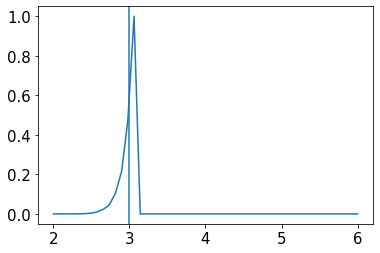

In [27]:
test.samples = False
result = np.zeros(50)
slopes = np.linspace(2.0, 6.0)
for i in range(50):
    result[i] = test.pop_like(pop, [0.63, 1.35, 0.07, 1.85, 0.35, 2, slopes[i], 2, 1, 0])
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(3.0)

Processing code for LMG

In [28]:
import processing

In [ ]:
processing.processing('LMG_convergence_medspin', mode='LMG_txt', plot=True)

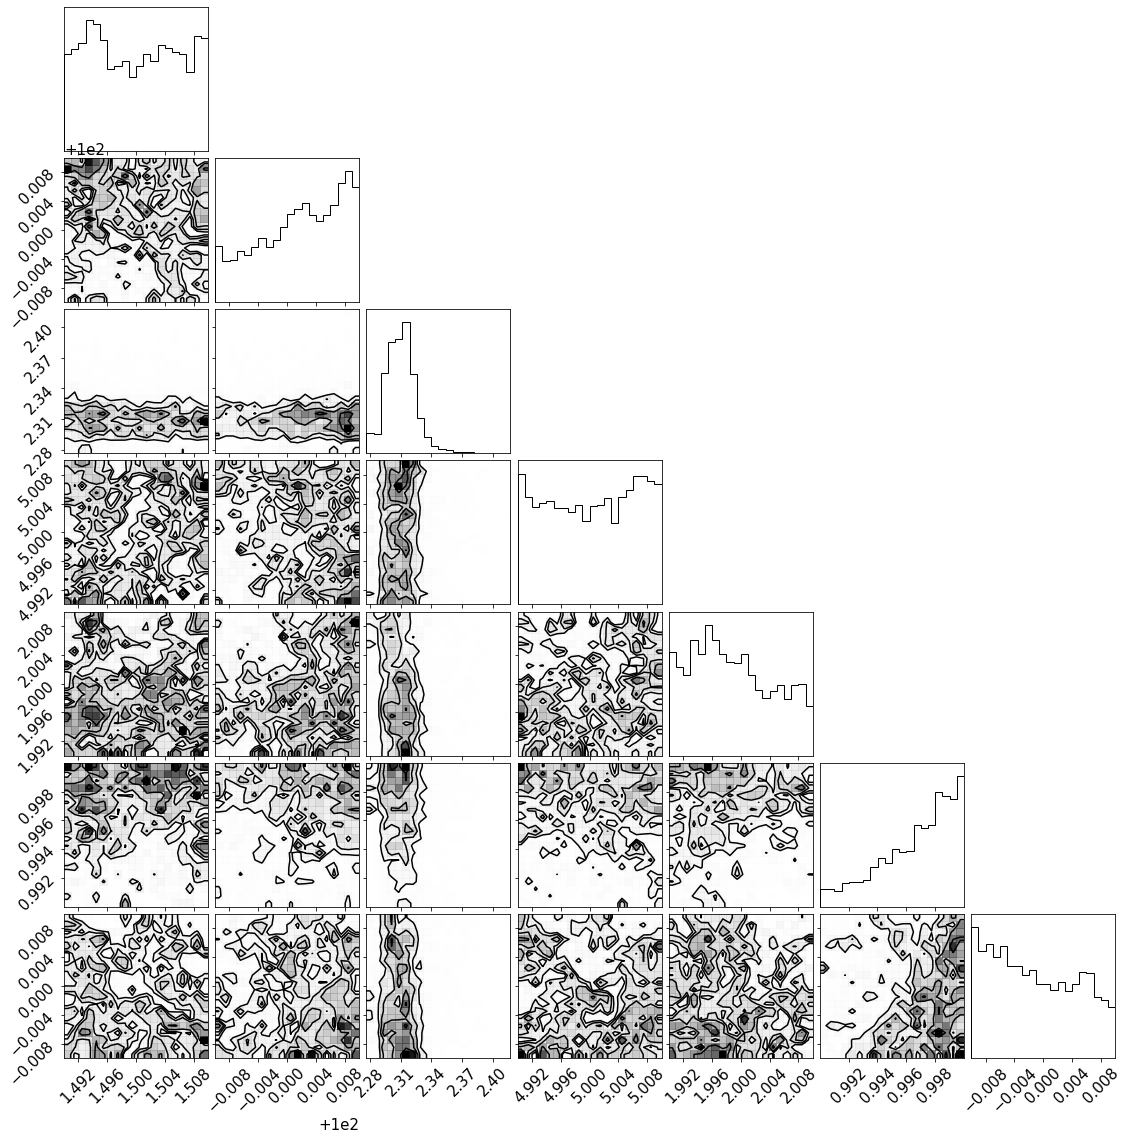

In [187]:
corner.corner(np.genfromtxt('../spin_results/mTOV_convergence_99pc/Design_mTOV_2.0_run_50_u_bias.txt')[:], plot_datapoints=False);

In [46]:
processing.processing('real_data', 'real_data_txt', name='widespin')
processing.processing('real_data', 'real_data_99pc', name='widespin')

1c_widespin_chieff_nogw190814_nogw190426_
2.127890634303104 6.580260287299153 4.53590947377557 0.9985965541995693
1c_widespin_chieff_nogw190814_nogw190426_0q
2.289065918824835 6.452741691452307 6.023122619872393 0.9929325197415649
1c_widespin_chieff_nogw190814_withgw190426_
2.0818873701978355 5.7080604486506585 3.648126018461576 0.9985068198133524
1c_widespin_chieff_nogw190814_withgw190426_0q
2.1608705106728507 5.675471935852155 5.756953249319508 0.9946625987078248
1c_widespin_chieff_withgw190814_nogw190426_
2.783175611981822 6.345535498143184 0.9253342819379864 0.9934799095669927
1c_widespin_chieff_withgw190814_nogw190426_0q
2.871141633201792 6.206906558687026 3.2110518323040984 0.9725412778176598
1c_widespin_chieff_withgw190814_withgw190426_
2.8121244859682495 5.520159390519305 0.9089448308848641 0.9948815506101938
1c_widespin_chieff_withgw190814_withgw190426_0q
2.880728412447218 5.387559016058184 3.3827520158405684 0.9685391241923905
1c_widespin_direct_nogw190814_nogw190426_
2.18723

2.776416215492169 6.3015760498794915 3.2195511469809084 0.9722642985850377
u_widespin_pos_chieff_withgw190814_withgw190426_
2.6493608095497505 5.698928650824939 1.0107388795659076 0.9985427135678392
u_widespin_pos_chieff_withgw190814_withgw190426_0q
2.754520464207637 5.549940162338932 3.3353577215579353 0.9732232591529074
1c_widespin_chieff_nogw190814_nogw190426_
0.999
1c_widespin_chieff_nogw190814_nogw190426_0q
0.997
1c_widespin_chieff_nogw190814_withgw190426_
1.0
1c_widespin_chieff_nogw190814_withgw190426_0q
0.999
1c_widespin_chieff_withgw190814_nogw190426_
0.995
1c_widespin_chieff_withgw190814_nogw190426_0q
0.977
1c_widespin_chieff_withgw190814_withgw190426_
0.996
1c_widespin_chieff_withgw190814_withgw190426_0q
0.969
1c_widespin_direct_nogw190814_nogw190426_
0.993
1c_widespin_direct_nogw190814_nogw190426_0q
0.973
1c_widespin_direct_nogw190814_withgw190426_
0.996
1c_widespin_direct_nogw190814_withgw190426_0q
0.99
1c_widespin_direct_withgw190814_nogw190426_
0.959
1c_widespin_direct_wi

In [9]:
table = processing.table_realdata(save=True, name='widespin')

1c_widespin_chieff_nogw190814_nogw190426_.txt
1c_widespin_chieff_nogw190814_nogw190426_0q.txt
1c_widespin_chieff_nogw190814_withgw190426_.txt
1c_widespin_chieff_nogw190814_withgw190426_0q.txt
1c_widespin_chieff_withgw190814_nogw190426_.txt
1c_widespin_chieff_withgw190814_nogw190426_0q.txt
1c_widespin_chieff_withgw190814_withgw190426_.txt
1c_widespin_chieff_withgw190814_withgw190426_0q.txt
1c_widespin_direct_nogw190814_nogw190426_.txt
1c_widespin_direct_nogw190814_nogw190426_0q.txt
1c_widespin_direct_nogw190814_withgw190426_.txt
1c_widespin_direct_nogw190814_withgw190426_0q.txt
1c_widespin_direct_withgw190814_nogw190426_.txt
1c_widespin_direct_withgw190814_nogw190426_0q.txt
1c_widespin_direct_withgw190814_withgw190426_.txt
1c_widespin_direct_withgw190814_withgw190426_0q.txt
1c_widespin_pos_chieff_nogw190814_nogw190426_.txt
1c_widespin_pos_chieff_nogw190814_nogw190426_0q.txt
1c_widespin_pos_chieff_nogw190814_withgw190426_.txt
1c_widespin_pos_chieff_nogw190814_withgw190426_0q.txt
1c_wides

In [10]:
import pandas as pd 
pd.DataFrame(table)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chieff,False,False,1c,3,$2.1^{+0.6}_{-0.2}$,1.9,$2.1^{+0.3}_{-0.1}$,$6.6^{+0.4}_{-0.7}$,$4.5^{+3.4}_{-2.8}$,$4.3^{+0.6}_{-0.9}$,$4.4^{+0.5}_{-0.9}$,0.999,0.996
1,chieff,False,False,1c,0,$2.3^{+0.7}_{-0.3}$,1.9,$2.2^{+0.5}_{-0.3}$,$6.5^{+0.5}_{-1.0}$,$6.0^{+2.6}_{-2.5}$,$4.0^{+0.7}_{-1.1}$,$4.2^{+0.6}_{-1.0}$,0.997,0.984
2,chieff,False,True,1c,3,$2.1^{+0.7}_{-0.2}$,1.8,$2.0^{+0.2}_{-0.1}$,$5.7^{+0.7}_{-0.6}$,$3.6^{+3.2}_{-2.4}$,$3.5^{+0.7}_{-0.8}$,$3.6^{+0.7}_{-0.7}$,1.000,0.995
3,chieff,False,True,1c,0,$2.2^{+0.7}_{-0.2}$,1.9,$2.1^{+0.4}_{-0.2}$,$5.7^{+0.8}_{-0.7}$,$5.8^{+2.6}_{-2.1}$,$3.4^{+0.8}_{-1.0}$,$3.5^{+0.8}_{-0.8}$,0.999,0.980
4,chieff,True,False,1c,3,$2.8^{+0.4}_{-0.2}$,2.5,$2.7^{+0.2}_{-0.1}$,$6.3^{+0.5}_{-1.0}$,$0.9^{+1.3}_{-0.7}$,$3.5^{+0.6}_{-1.0}$,$3.7^{+0.5}_{-1.1}$,0.995,0.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,pos,False,True,u,0,$2.1^{+0.4}_{-0.1}$,1.8,$2.0^{+0.3}_{-0.1}$,$5.9^{+0.6}_{-0.7}$,$6.1^{+2.4}_{-2.3}$,$3.8^{+0.7}_{-0.8}$,$3.8^{+0.7}_{-0.8}$,0.997,0.991
68,pos,True,False,u,3,$2.7^{+0.2}_{-0.1}$,2.5,$2.6^{+0.2}_{-0.1}$,$6.6^{+0.5}_{-1.0}$,$0.9^{+1.2}_{-0.7}$,$3.8^{+0.5}_{-1.0}$,$3.9^{+0.5}_{-1.0}$,0.996,0.989
69,pos,True,False,u,0,$2.8^{+0.3}_{-0.2}$,2.5,$2.8^{+0.3}_{-0.2}$,$6.3^{+0.7}_{-1.5}$,$3.2^{+1.5}_{-1.1}$,$3.4^{+0.7}_{-1.5}$,$3.4^{+0.8}_{-1.3}$,0.985,0.936
70,pos,True,True,u,3,$2.6^{+0.2}_{-0.1}$,2.5,$2.6^{+0.2}_{-0.1}$,$5.7^{+0.6}_{-0.6}$,$1.0^{+1.2}_{-0.7}$,$3.0^{+0.6}_{-0.6}$,$3.0^{+0.6}_{-0.6}$,0.997,0.990


Processing real data

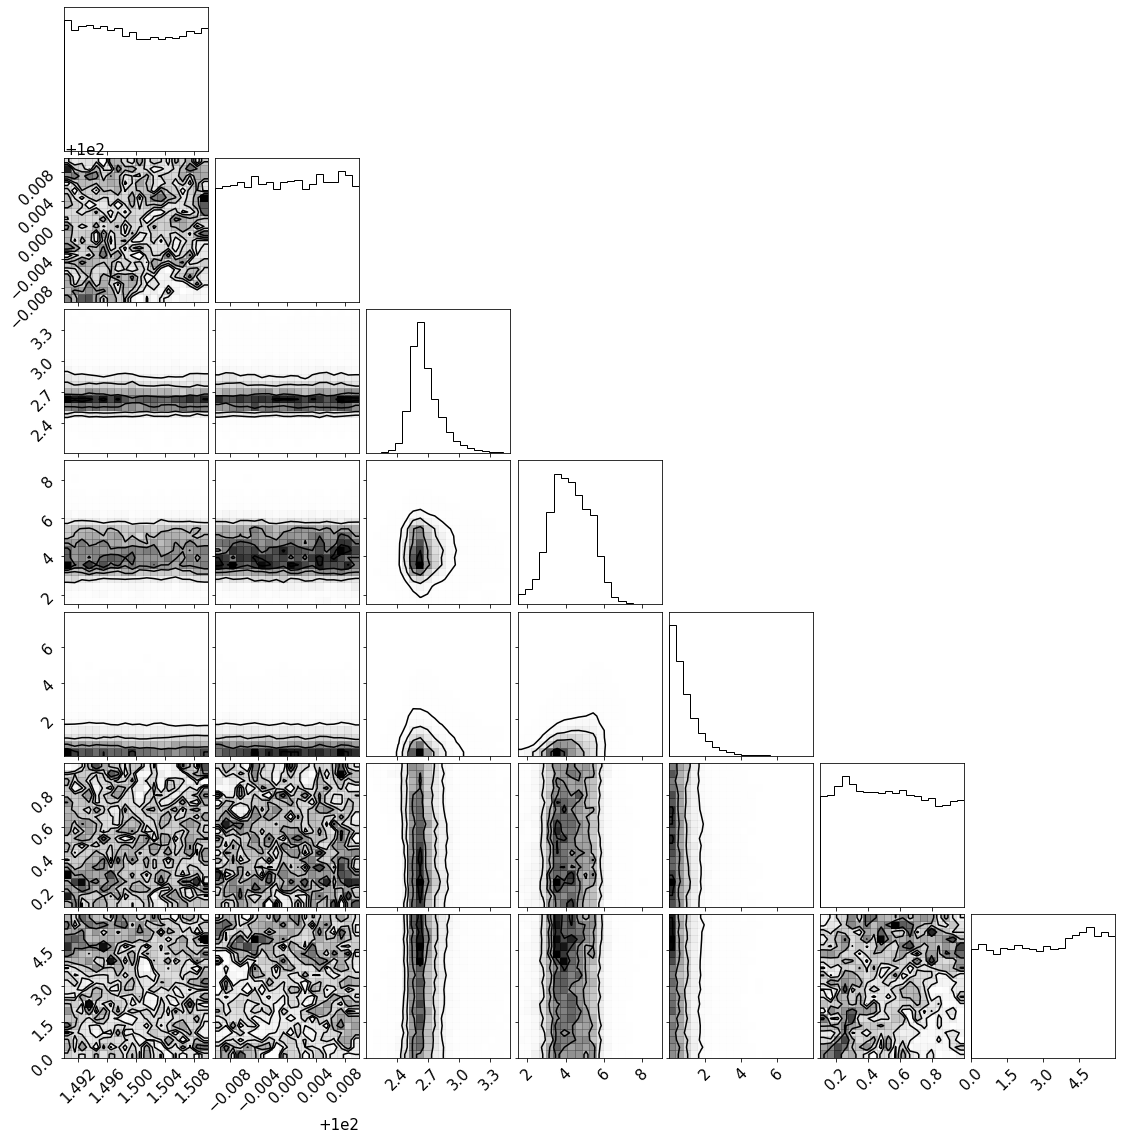

In [11]:
root='u_widespin_direct_withgw190814_withgw190426_'
real = np.genfromtxt('../spin_results/real_data/{}.txt'.format(root))
likes = np.genfromtxt('../spin_results/real_data/{}_likes.txt'.format(root))
corner.corner(real[real[:,2] > 2.1][:, :], plot_datapoints=False); 


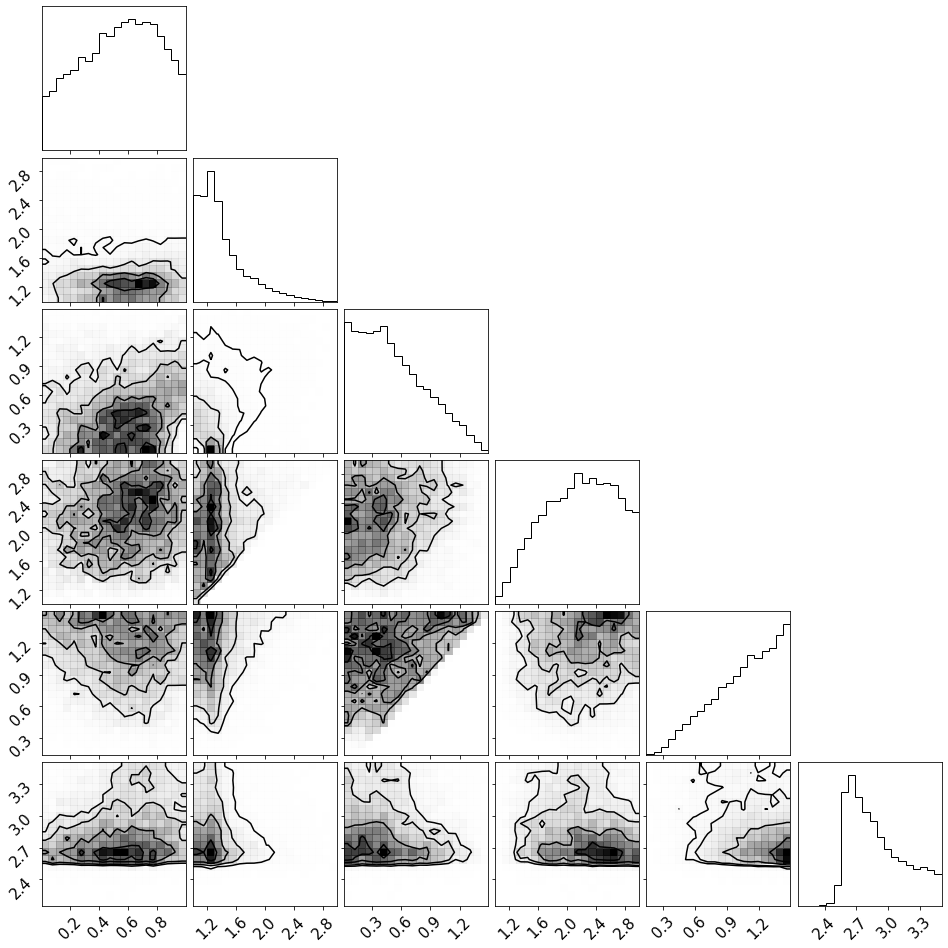

In [21]:
root='2c_widespin_chieff_withgw190814_withgw190426_0q'
real = np.genfromtxt('../spin_results/real_data/{}.txt'.format(root))
#likes = np.genfromtxt('../spin_results/real_data/{}_likes.txt'.format(root))
corner.corner(real[:, :6], plot_datapoints=False); 
#plt.savefig('../spin_results/figures/real_data/{}_fullcorner.pdf'.format(root))

Text(0.5, 0, 'width ($M_\\odot$)')

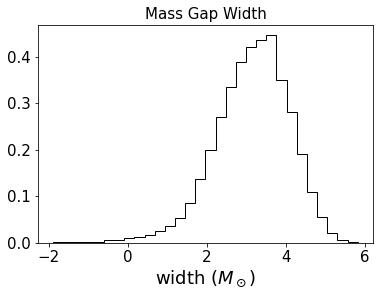

In [30]:
massgap = real[real[:,5]<=1][:,3]-real[real[:,5]<=1][:,2]
hist = plt.hist(massgap, histtype='step', color='k', density=True, bins=30)
plt.title('Mass Gap Width')
plt.xlabel('width ($M_\odot$)')
#get_constraints(massgap, 'massgap/{}.txt'.format(root))

In [56]:
real = real[:,[2,3]]

In [57]:
likes = likes[np.argsort(real[:,0])]
real = real[np.argsort(real[:,0])]

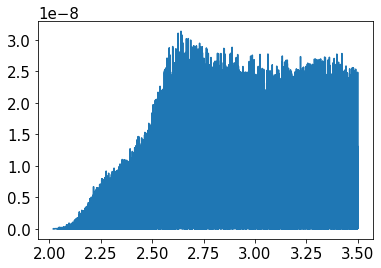

In [59]:
plt.plot(real[:, 0], np.exp(likes))

In [139]:
samples = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component.txt')
likes = np.genfromtxt('/mnt/c/users/christine/gwcosmology/spin_results/mTOV_convergence/mTOV_2_run_50_2component_likes.txt')

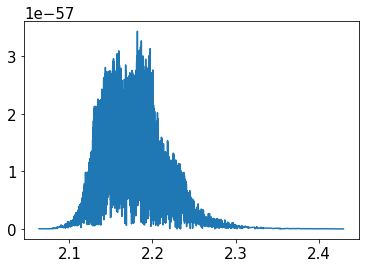

In [140]:
plt.plot(samples[:,5][np.argsort(samples[:,5])], np.exp(likes[np.argsort(samples[:,5])]))

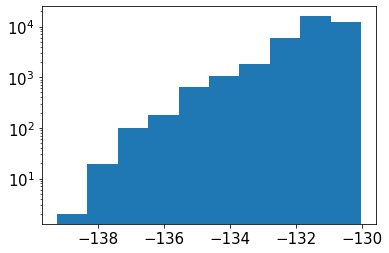

In [138]:
plt.hist(likes)
plt.yscale('log')

Inspecting individual events' posteriors

In [404]:
pop = np.genfromtxt('./results/pop_samples.txt')

In [414]:
test.samples=True

In [406]:
pop = pop.reshape((50, 3000, 4))

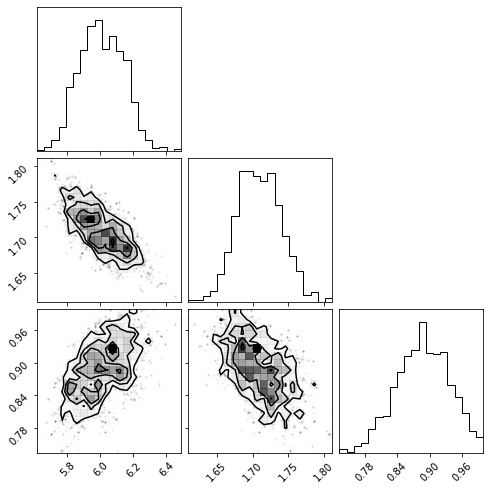

In [411]:
corner.corner(pop[30][:,[0,1,3]]);

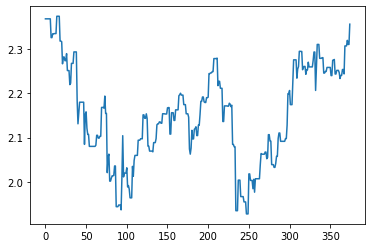

In [111]:
plt.plot(pop[1][::8,1]) # trace plot

More testing for bias

In [19]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=False, spin_params=[1, 1])

vary slope: False
selection: True
spinning: False
no m1 spin: True


In [22]:
pop = test.get_population(20, False)

0.046620046620046623


In [13]:
test.samples = True
test.pop_like(pop, [1.4, 0.5, 2, 5, 4])

-76.63955081476718

/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1131: RuntimeWarning: divide by zero encountered in log
  


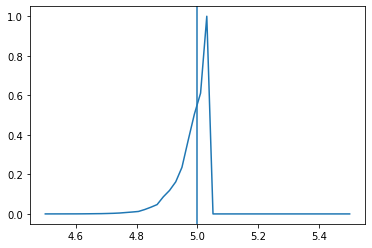

In [28]:
test.set_injection_spins(p.injection_set)
result = np.zeros(50)
slopes = np.linspace(4.5, 5.5)
#slopes = np.linspace(0.1, 1)
for i in range(50):
    result[i] = test.pop_like(pop, [1.4,  0.5,  2,slopes[i], 4])
plt.plot(slopes, np.exp(result-np.max(result)))
plt.axvline(5)

OLD AND USELESS CODE

In [413]:
test = p.Population([1.4, 0.5, 2, 1, 3, 5, 4], 'nsbh_one', False, selection=True, m1_nospin = True, spinning=True, spin_params=[1, 0])

vary slope: False
selection: True
spinning: True
no m1 spin: True


In [321]:
test = p.Population([1.4, 0.5, 2, 0, 3], 'one', False, selection=False, m1_nospin = True, spinning=False)

vary slope: False
selection: False
spinning: False
no m1 spin: True


In [310]:
pop = test.get_population(10000, False)

1.0


In [369]:
data = p.generate_truncnormal(10000,1.4, 0.5, 1, 2)

In [311]:
data = pop[:,:,0].squeeze()

In [380]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=np.sum(np.log(p.truncnormal_like(data, mus[i], sigmas[j], 1, 2) * p.like_m2(data2, data, 1, 3))) #pop[:,:,0].squeeze()

1.0


[  1.           1.99784023   2.98903023 ... 135.1032793  135.1032793
 135.1032793 ]
[0.68 0.95]


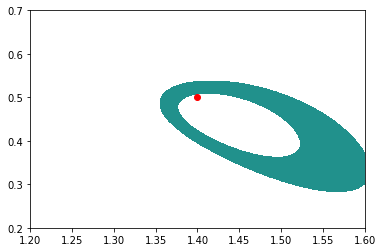

In [381]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [ ]:
pop = test.get_population(1000, False)
data = pop[:,:,0].squeeze()
data2 = pop[:,:,1].squeeze()
mus = np.linspace(1.2, 1.6)
sigmas = np.linspace(0.2, 0.7)
results = np.zeros((50,50))
for i in range(50):
    print(i)
    for j in range(50):
        results[i,j]=test.pop_like(pop, params=[mus[i], sigmas[j], 2]) #pop[:,:,0].squeeze()

[  1.           1.98104363   2.95841679 ... 145.38011032 145.38011032
 145.38011032]
[0.68 0.95]


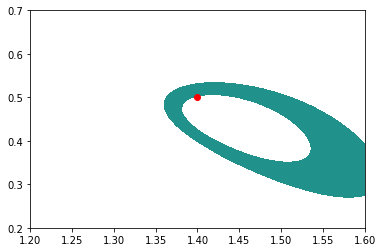

In [368]:
plt.contourf(np.exp(results-np.max(results)), extent=[np.min(mus), np.max(mus), np.min(sigmas), np.max(sigmas)], levels=credible_levels(np.exp(results-np.max(results)).flatten(), np.array([0.68, 0.95])))
plt.scatter(1.4, 0.5, c='r')

In [241]:
def credible_levels(ps, fs):
    """Find the probability levels that correspond to a given array of credible levels, e.g. to then pass into the levels argument of a contour plot
    Parameters:
       ps (1-d numpy array):
          the PDF values, a flattened array
       fs (1-d numpy array):
          the desired credible levels in ascending order, e.g. array([0.5,0.9]) for 50% and 90% credible levels
    """
    sorter = np.argsort(ps)
    ps_sorted = ps[sorter]
    ps_sorted = ps_sorted[::-1] #largest to smallest
    csum = np.cumsum(ps_sorted)
    print(csum)
    print(fs) 
    idxs = np.searchsorted(csum,fs*csum[-1])
    levels = ps_sorted[idxs]
    levels = levels[::-1]
    return levels

In [73]:
a, b = test.infer(pop, fixed={"m_TOV":2, "bh_min": 5, "bh_slope": 4, "max_jjkep": 1, "spin_slope": 1}, steps=1000)

 40%|████      | 401/1000 [00:44<01:12,  8.27it/s]/mnt/c/users/christine/gwcosmology/spin!!/populations.py:1020: RuntimeWarning: divide by zero encountered in log
  result = np.sum([np.log(self.event_likelihood_one_single(i, params)/mu) for i in samples])
100%|██████████| 1000/1000 [01:56<00:00,  8.57it/s]


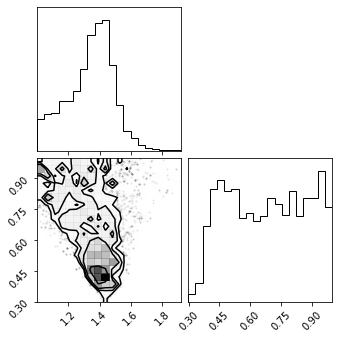

In [74]:
corner.corner(a[:,[0,1]]);

In [64]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

In [75]:
mus = np.linspace(1, 2)
sigmas = np.linspace(0.1, 1.0)
results = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        results[i,j]=test.pop_like(pop, [mus[i], sigmas[j], 2, 5, 4, 1, 1])

In [ ]:
def get_constraints_1c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_1C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

def get_constraints_lmg_2c(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[6,5])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[6,5])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[6,5])
        med = get_quantiles(run_name, 2, [0.5], columns=[6,5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
        if i == 4:
            print(run_name)
    np.savetxt('../spin_results/outputs/{}/{}_2c_{}_{}.txt'.format(folder, detector, mTOV, bhmin), constraints)
    return constraints

def get_constraints_lmg_u(counts, mTOV, bhmin, hist=False, detector="APlus", folder = 'LMG_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_bhmin_{}_{}_u.txt'.format(detector, mTOV,bhmin,  counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder, columns=[3,2])
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder, columns=[3,2])
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder, columns=[3,2])
        med = get_quantiles(run_name, 2, [0.5], columns=[3,2], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
        if i == 4:
            print(run_name)
    np.savetxt('../spin_results/outputs/{}/{}_u_{}_{}.txt'.format(folder, detector, mTOV, bhmin), constraints)
    return constraints

def get_constraints_slope_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_slope.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 8, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 8, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 8, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 8, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_slope_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

def get_bias_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2c_bias.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_bias_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

def get_constraints_2c(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_2component.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 5, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 5, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 5, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 5, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_2C_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

def get_constraints_u(counts, mTOV, hist=False, detector="APlus", folder = 'mTOV_convergence'):
    constraints = np.zeros((len(counts), 7))
    for i in range(len(counts)):
        run_name = '/{}_mTOV_{}_run_{}_uniform.txt'.format(detector, mTOV, counts[i])
        sigma_1 = get_quantiles(run_name, 2, [0.159, 0.841],hist=hist, folder=folder)
        sigma_2 = get_quantiles(run_name, 2, [0.025, 0.975], folder=folder)
        sigma_3 = get_quantiles(run_name, 2, [0.0015, 0.997], folder=folder)
        med = get_quantiles(run_name, 2, [0.5], folder=folder)
        constraints[i] = [sigma_3[0], sigma_2[0], sigma_1[0], med[0], sigma_1[1], sigma_2[1], sigma_3[1]]
    np.savetxt('../spin_results/outputs/{}/{}_mTOV_u_{}.txt'.format(folder, detector, mTOV), constraints)
    return constraints

def calc_convergence(file, counts=np.linspace(10,50,5,dtype='int16'), plot=True):
    constraints = np.genfromtxt(file)
    sig3 = constraints[:,-1]-constraints[:,0]
    sig2 = constraints[:,-2]-constraints[:,1]
    sig1 = constraints[:,-3]-constraints[:,2]
    if plot:
        plt.plot(counts, sig3, label='3$\sigma$')
        plt.plot(counts, sig2, label='2$\sigma$')
        plt.plot(counts, sig1, label='1$\sigma$')
        plt.yscale('log')
        plt.xscale('log')
    p = np.polyfit(x=np.log(counts), y=np.log(sig1), deg=1)
    print(p)

In [ ]:
import os
plt.ioff()
base = 'LMG_convergence_medspin'
folder = '../spin_results/{}/'.format(base)
combinations = [] #['2.0', '2.0']
for i in os.listdir(folder):
    # print(i)
    if 'likes' not in i and os.path.isfile(os.path.join(folder,i)) and "Design" in i:
        root = i.split('.txt')[0]
        
        mTOV = root.split('_')[2]
        bhmin = root.split('_')[4]
        if [mTOV, bhmin] not in combinations:
            print(root)
            combinations.append([mTOV, bhmin])
            
            if 'u' in root:
                constraints = get_constraints_lmg_u(np.linspace(10,50,5, dtype='int16'), mTOV, bhmin, detector='Design', folder=base)

            else:
                constraints = get_constraints_lmg_2c(np.linspace(10,50,5, dtype='int16'), mTOV, bhmin, detector='Design', folder=base)
        
            fig = plt.figure()
            plot_constraints(constraints, counts=np.linspace(10,50,5))
            plt.savefig('../spin_results/outputs/{}/{}.png'.format(base, root))
            plt.close(fig)